In [45]:
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_breast_cancer

In [46]:
breast_cancer = load_breast_cancer()
df_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df_cancer['target'] = pd.Series(breast_cancer.target)

In [47]:
from sklearn.model_selection import train_test_split
X = df_cancer.drop(['target'], axis=1)
y = df_cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Yellowbrick

/Users/parinmody/Desktop/anaconda3/envs/PythonData/lib/python3.7/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


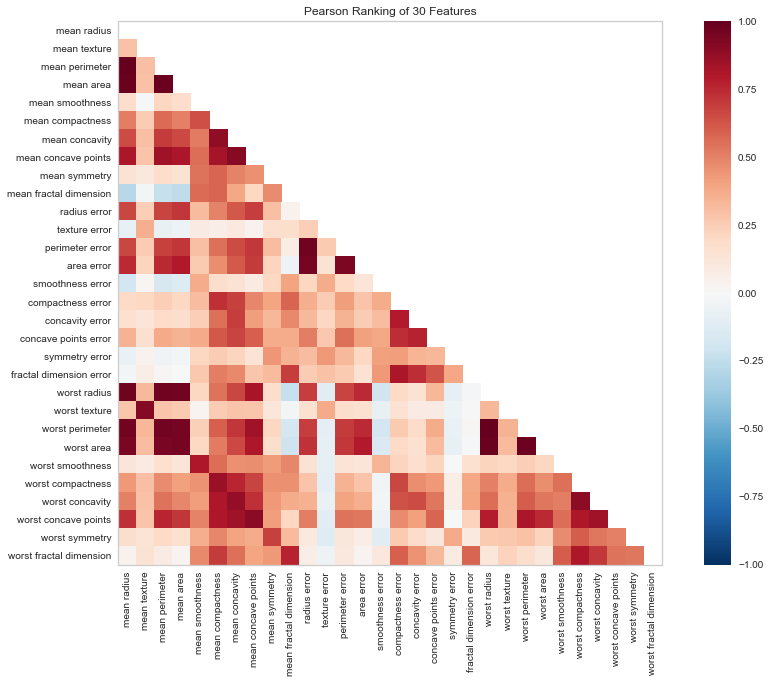

In [50]:
from yellowbrick.features import Rank2D
import matplotlib.pyplot as plt
visualizer = Rank2D(algorithm="pearson",  size=(1080, 720))
visualizer.fit_transform(X_train)
visualizer.poof()

/Users/parinmody/Desktop/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


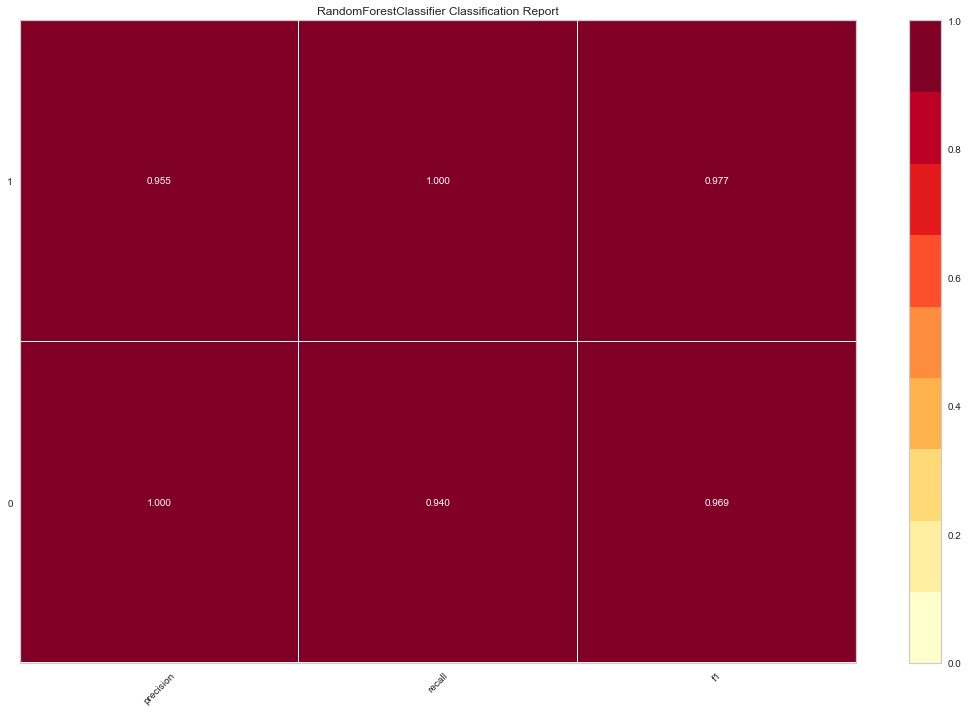

In [51]:
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier()
visualizer = ClassificationReport(model, size=(1080, 720))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

# ELI5

In [52]:
import eli5
eli5.show_weights(model, feature_names = X.columns.tolist())

Weight,Feature
0.1671 ± 0.5516,mean concave points
0.1348 ± 0.4601,worst concave points
0.0834 ± 0.3527,area error
0.0792 ± 0.3672,mean perimeter
0.0776 ± 0.2738,worst perimeter
0.0689 ± 0.2970,worst concavity
0.0594 ± 0.3083,mean area
0.0589 ± 0.3235,mean concavity
0.0522 ± 0.1169,worst area
0.0464 ± 0.2072,worst compactness


In [53]:
from eli5 import show_prediction
show_prediction(model, X_train.iloc[1], feature_names = X.columns.tolist(), 
                show_feature_values=True)

# LIME

In [54]:
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,     
                                                   feature_names=X_train.columns.values.tolist(),               
                                                   class_names=y_train.unique())

In [55]:
predict_fn = lambda x: model.predict_proba(x).astype(float)

In [56]:
exp = explainer.explain_instance(X_test.values[0], predict_fn, num_features=6)
exp.show_in_notebook(show_all=False)

# MLxtend

In [57]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.gridspec as gridspec
import itertools
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [58]:
X_train_ml = X_train[['worst concave points', 'worst radius']].values
y_train_ml = y_train.values

/Users/parinmody/Desktop/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  
/Users/parinmody/Desktop/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/parinmody/Desktop/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  


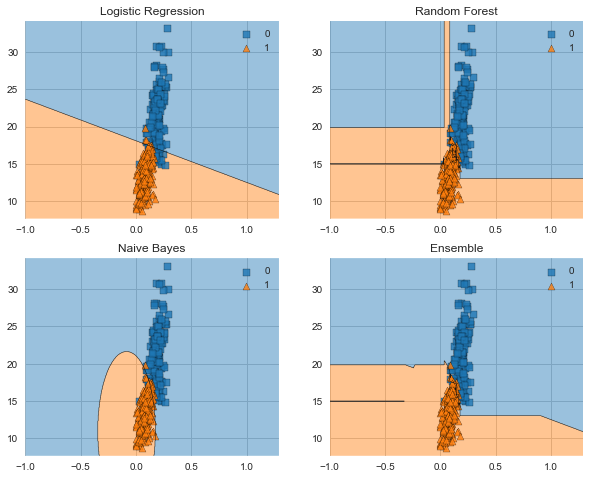

In [59]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])
value=1.5
width=0.75
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10,8))
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):
                         
    clf.fit(X_train_ml, y_train_ml)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_ml, y=y_train_ml, clf=clf)
    plt.title(lab)

# ------------------------------------------

In [71]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing our cancer dataset
dataset = pd.read_csv('datasets/Wisconsindata_test.csv')
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values

In [72]:
dataset

TypeError: __init__() got an unexpected keyword argument 'max_rows'

           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1       17.990         10.38          122.80   
1      842517          1       20.570         17.77          132.90   
2    84300903          1       19.690         21.25          130.00   
3    84348301          1       11.420         20.38           77.58   
4    84358402          1       20.290         14.34          135.10   
5      843786          1       12.450         15.70           82.57   
6      844359          1       18.250         19.98          119.60   
7    84458202          1       13.710         20.83           90.20   
8      844981          1       13.000         21.82           87.50   
9    84501001          1       12.460         24.04           83.97   
10     845636          1       16.020         23.24          102.70   
11   84610002          1       15.780         17.89          103.60   
12     846226          1       19.170         24.80          132.40   
13    

In [73]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 32)


In [74]:
dataset.isnull().sum()
dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [75]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [76]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [77]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

/Users/parinmody/Desktop/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  
/Users/parinmody/Desktop/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  return solver


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [79]:
Y_pred = classifier.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# ------------------------------------------------